# <b><span style='color:#0386f7de'>|</span> Idan Chen project - Personal Key Indicators of Heart Disease</b>


![logo](logo.png)

<nav>
<a href="https://www.linkedin.com/in/idan-chen-8b9a641b9">LinkedIn</a> |
<a href="https://github.com/idanwork22/john_bryce_all/tree/master/ML%20project">Github</a> |                  
</nav>

 ---


# <b><span style='color:#0386f7de'>|</span> Table Of Contecnts:</b>

 * ### [Imports](#Imports)
 * ### [Data Preparation](#Data_Preparation)
     * #### [Missing values or outliers](#outliers)
     * #### [Couple visualizations](#vis)
     * #### [Find the best columns for ML on HeartDisease based on their Corr](#corr)
     * #### [Dummy variables for categorical variables](#dummy)
     * #### [Imblance](#imblance)
 * ### [Models](#model)
      * #### [Logistic Regression](#lr)
      * #### [KNN](#knn)
      * #### [DT](#dt)
 * ### [Comparison](#Comparison)
 * ### [Summary](#summary)

 ---


# <b><span style='color:#0386f7de'>|</span> Imports <a class="anchor" id="Imports"></a></b>

In [3]:
# basic imports
import pandas as pd
import numpy as np
from collections import Counter

#plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# settings immports
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 40
import plotly.io as pio
pio.renderers.default = "iframe"

# Unbalance data imports
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import sklearn.linear_model as sklin
import sklearn.metrics as met

<mark>Igal</mark> do not forget to use <mark>use_jedi = False</mark> :)

In [4]:
%config Completer.use_jedi = False

 ---


## <b><span style='color:#0386f7de'>|</span> Data preperation <a class="anchor" id="Data_Preparation"></a></b>

In [5]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


 ---


## <b><span style='color:#0386f7de'>|</span> Missing values or outliers <a class="anchor" id="outliers"></a></b>

In [7]:
df.isna().sum().sum()

0

<div class="alert alert-block alert-info">
<b>Tip:</b> zero nan = 😀😀 = make my life much better.</div>

In [8]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

 ---


## <b><span style='color:#0386f7de'>|</span> Basic visualisations for analysis <a class="anchor" id="vis"></a></b>

#### histplot of SleepTime devided to 24 bins (number of hours per day)

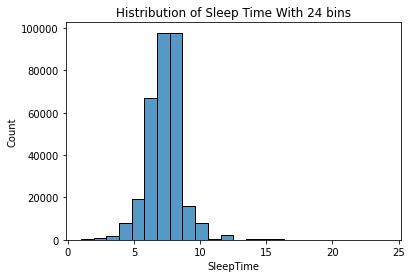

In [10]:
ax = sns.histplot(data=df,x='SleepTime',bins=24)
_ = ax.set_title("Histribution of Sleep Time With 24 bins")

### kdeplot of BMI divided by Heart Disease Label

<div class="alert alert-block alert-warning">
<b>Explanation:</b> I added BMI photo explanation for checking if the result of the BMI's distribution is ok
</div>


![BMI](BMI_img.png)

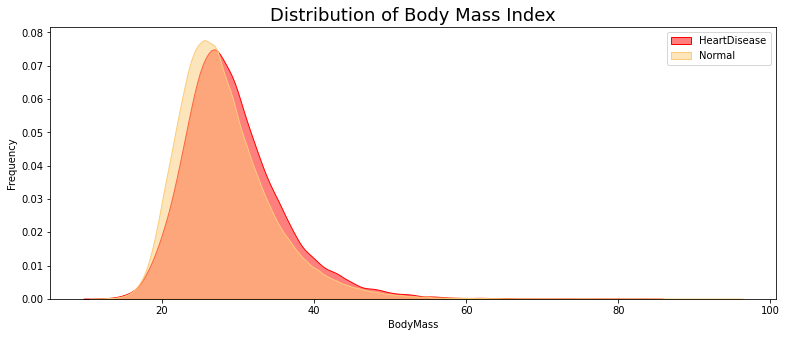

In [11]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()

#### Function that get df and column name and plot countplot with bar labels

In [12]:
def create_count_plot(x_size,y_size, df, column_name):
    fig = plt.figure(figsize=(x_size,y_size))
    plt.title(column_name,fontsize=15)
    ax = sns.countplot(x=df[column_name],
                       order=df[column_name].value_counts(ascending=False).index);
    abs_values = df[column_name].value_counts(ascending=False).values
    _ = ax.bar_label(container=ax.containers[0], labels=abs_values)

#### count plot of Age Category

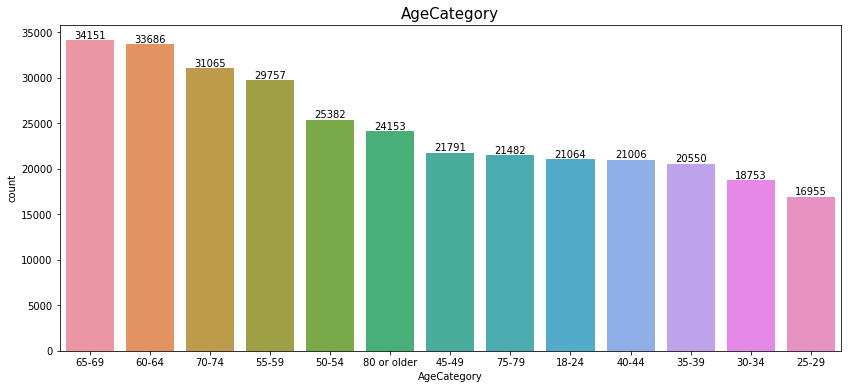

In [15]:
create_count_plot(x_size= 14, y_size = 6,df=df, column_name="AgeCategory")

 ---


## <b><span style='color:#0386f7de'>|</span> Find the best columns for ML on HeartDisease based on their Corr <a class="anchor" id="corr"></a></b>

In [16]:
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.update_layout(height=600)
fig.show()

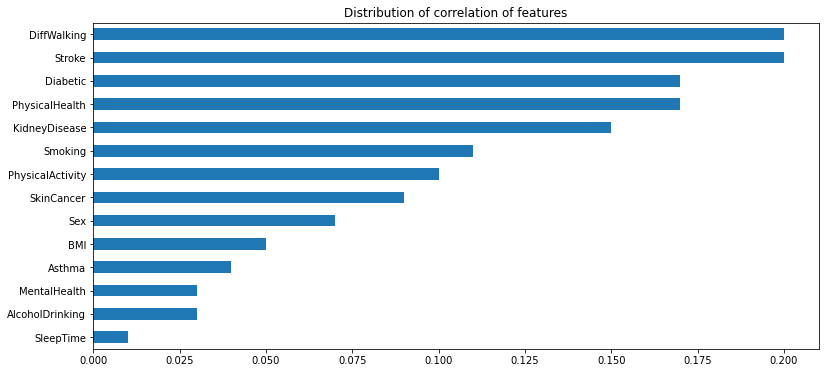

In [18]:
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

 ---


### After Reaserch by using catplot and pandas corr I Found the suits colums are:
- Smoking   
- Stroke
- PhysicalHealth
- DiffWalking
- Sex
- AgeCategory
- Diabetic
- PhysicalActivity	
- GenHealth

By the way - It's very intersting to figure out that Sleep Time doesn't effect Heart Disease

<div class="alert alert-block alert-danger">
<b>Danger:</b> I found the suitests columns but the corrlelation is not great at all (the best is Stroke and DiffWaliking with 0.2 corr)
</div>

In [20]:
final_columns = ["Smoking","Stroke","PhysicalHealth","DiffWalking","Sex","AgeCategory","Diabetic","PhysicalActivity","GenHealth","HeartDisease"]

In [21]:
df = df[final_columns]

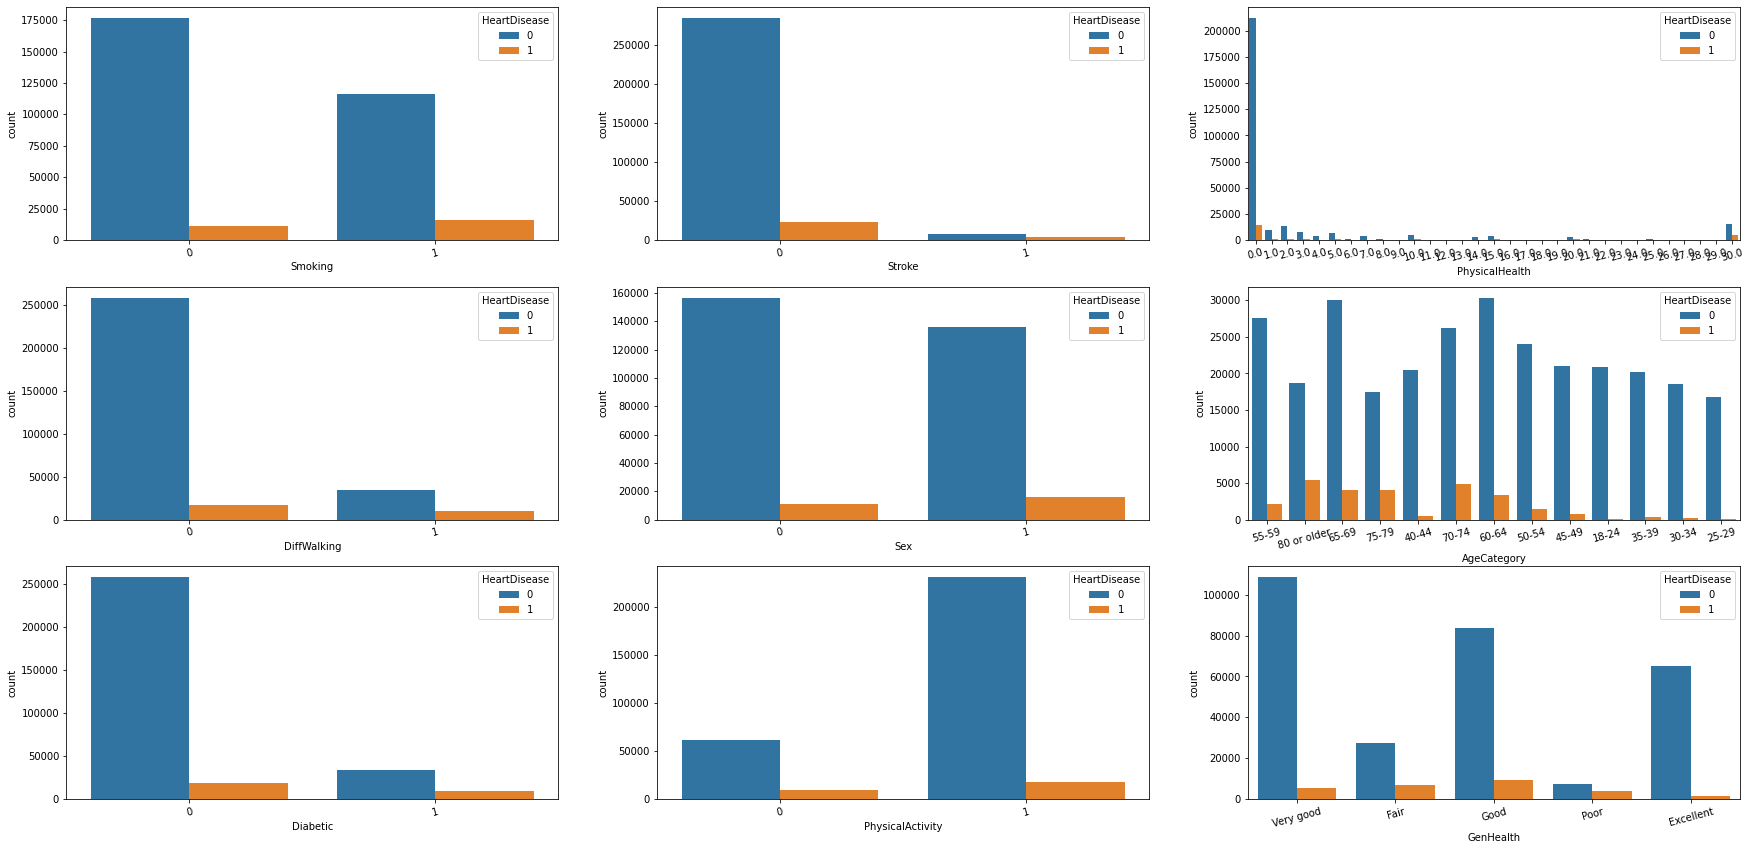

In [22]:
plt.figure(figsize=(30,30))
for i in enumerate(final_columns[:-1]):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='HeartDisease',data=df)
    plt.xticks(rotation=15)

 ---


## <b><span style='color:#0386f7de'>|</span> Dummy variables for categorical variables <a class="anchor" id="dummy"></a></b>

In [23]:
lst_of_dummy_variables = ['HeartDisease','Smoking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth']

In [24]:
df = pd.get_dummies(data=df,columns=lst_of_dummy_variables,drop_first=True)

In [25]:
df.head(1)

,PhysicalHealth,HeartDisease_1,Smoking_1,Stroke_1,DiffWalking_1,Sex_1,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Diabetic_1,PhysicalActivity_1,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1


 ---


## <b><span style='color:#0386f7de'>|</span>  Balance the data <a class="anchor" id="imblance"></a></b>

#### count plot of Heart Disease

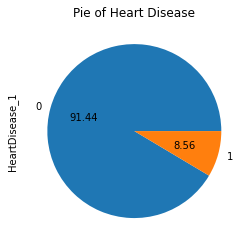

In [26]:
ax= df["HeartDisease_1"].value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Pie of Heart Disease")

In [27]:
rus = RandomUnderSampler()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease_1',axis=1), df['HeartDisease_1'], test_size=0.33, random_state=42)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test) 


In [29]:
Counter(y_rus_train)

Counter({0: 18225, 1: 18225})

In [30]:
Counter(y_rus_test)

Counter({0: 9148, 1: 9148})

In [31]:
df =  pd.concat([X_rus_train,y_rus_train],axis=1)

<div class="alert alert-block alert-success">
<b>Success:</b> We finish to prepere the data and now we can move forward to Model Training
</div>


### see the data after the Preparation

In [32]:
df.head(1)

,PhysicalHealth,Smoking_1,Stroke_1,DiffWalking_1,Sex_1,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Diabetic_1,PhysicalActivity_1,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease_1
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


 ---


# <b><span style='color:#0386f7de'>|</span>  Model Training <a class="anchor" id="model"></a></b>

### Important functions for model training

In [33]:
def evaluate_model(model, x_test, y_test):
    """
        This function gets model from skit-learn,
        x_test and y_test type numpy array
        and predict the y result using the model and the x_test.
        Then returns dict with the model result parameters:
        - accuracy
        - precision
        - recall score
        - f1 score
        - roc curve score
        - roc auc score
    """
    # Predict test date 
    y_pred = model.predict(x_test)

    # Calculate basics scores
    acc = met.accuracy_score(y_test, y_pred)
    prec = met.precision_score(y_test, y_pred)
    rec = met.recall_score(y_test, y_pred)
    f1 = met.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = met.roc_curve(y_test, y_pred_proba)
    auc = met.roc_auc_score(y_test, y_pred_proba)

    # confussion matrix
    cm = met.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1 ,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [34]:
def print_model_result(model_dict):
    """
        Gets dict of model and prints his numerical results
    """
    print('Accuracy:', model_dict['acc'])
    print('Precision:', model_dict['prec'])
    print('Recall:', model_dict['rec'])
    print('F1 Score:', model_dict['f1'])
    print('Area Under Curve:', model_dict['auc'])
    print('Confusion Matrix:\n', model_dict['cm'])

In [35]:
def draw_cm(title,cm):
    """
        This function get title type str and cm type sklearn.metrics.confution_matrix 
        and draw heatmap of the confution matrix results
    """
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
    ax.set_title(f"Confusion Matrix of {title} Model")
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

 ---


### <b><span style='color:#0386f7de'>|</span>  Logistic Regression <a class="anchor" id="lr"></a></b>

In [36]:
model=sklin.LogisticRegression()

In [37]:
model.fit(X_rus_train, y_rus_train)

LogisticRegression()

In [38]:
logistic_regression_result = evaluate_model(model, X_rus_test, y_rus_test)

In [39]:
print_model_result(logistic_regression_result)

Accuracy: 0.7581985133362483
Precision: 0.7495773457311918
Recall: 0.775470048097945
F1 Score: 0.7623038899634645
Area Under Curve: 0.8321443119022769
Confusion Matrix:
 [[6778 2370]
 [2054 7094]]


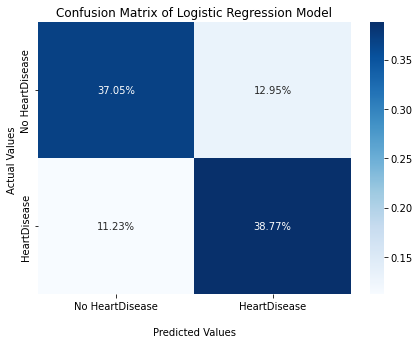

In [40]:
draw_cm("Logistic Regression",logistic_regression_result["cm"])

 ---

### <b><span style='color:#0386f7de'>|</span>  DecisionTreeClassifier <a class="anchor" id="dt"></a></b>

In [41]:
model=tree.DecisionTreeClassifier()

In [42]:
model.fit(X_rus_train, y_rus_train)

DecisionTreeClassifier()

In [43]:
dt_result = evaluate_model(model, X_rus_test, y_rus_test)

In [44]:
print_model_result(dt_result)

Accuracy: 0.7168233493659817
Precision: 0.7223405447819751
Recall: 0.7044162658504591
F1 Score: 0.7132658143782168
Area Under Curve: 0.7553596660675375
Confusion Matrix:
 [[6671 2477]
 [2704 6444]]


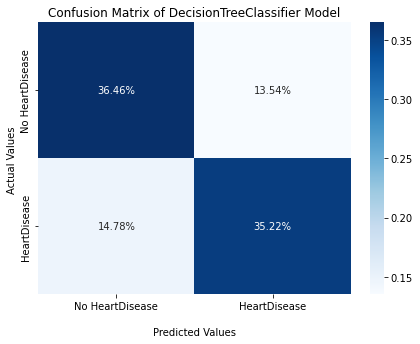

In [45]:
draw_cm("DecisionTreeClassifier",dt_result["cm"])

 ---


### <b><span style='color:#0386f7de'>|</span>  KNeighborsClassifier <a class="anchor" id="knn"></a></b>

In [46]:
model=KNeighborsClassifier()

In [47]:
model.fit(X_rus_train, y_rus_train)

KNeighborsClassifier()

In [48]:
knn_result = evaluate_model(model, X_rus_test, y_rus_test)

In [49]:
print_model_result(knn_result)

Accuracy: 0.635220813292523
Precision: 0.793127962085308
Recall: 0.36587232181897683
F1 Score: 0.5007480550568523
Area Under Curve: 0.7019081074872537
Confusion Matrix:
 [[8275  873]
 [5801 3347]]


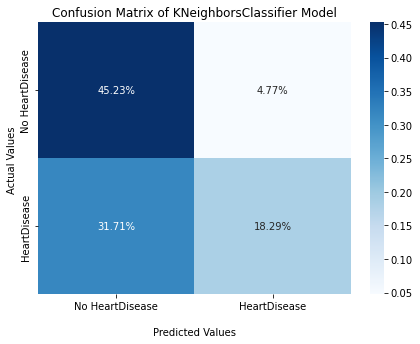

In [50]:
draw_cm("KNeighborsClassifier",knn_result["cm"])

 ---


# <b><span style='color:#0386f7de'>|</span>   Comparison <a class="anchor" id="Comparison"></a></b>

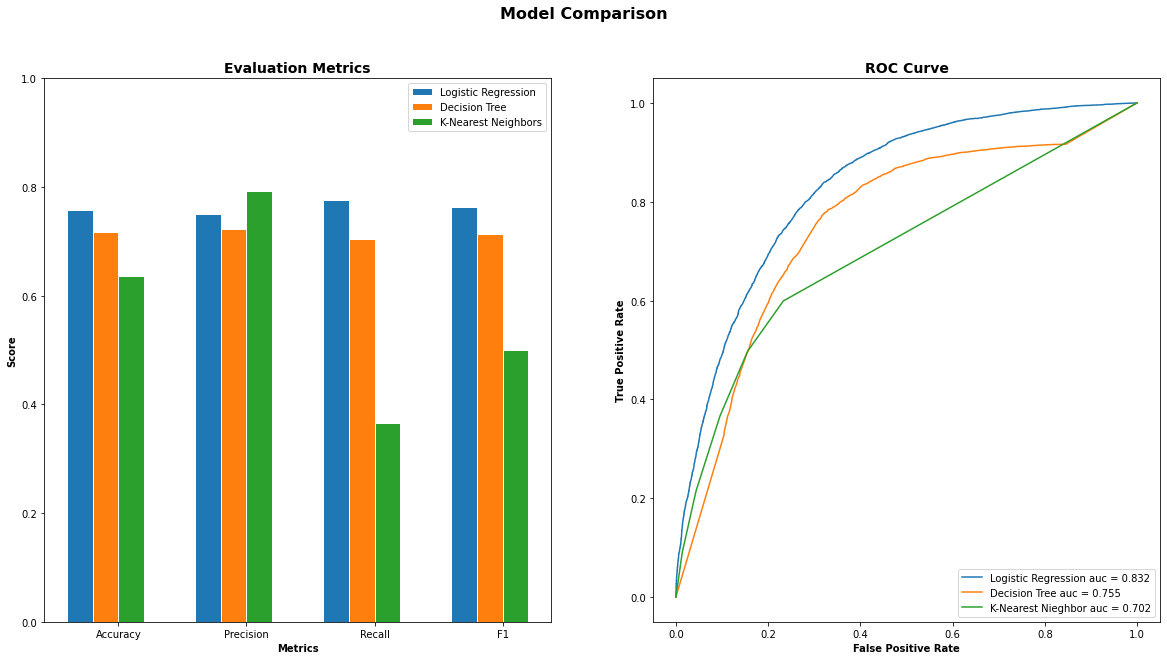

In [51]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
barWidth = 0.2
logistic_regression_result_score = [logistic_regression_result['acc'], logistic_regression_result['prec'], logistic_regression_result['rec'], logistic_regression_result['f1']]
dt_result_score = [dt_result['acc'], dt_result['prec'], dt_result['rec'], dt_result['f1']]
knn_result_score = [knn_result['acc'], knn_result['prec'], knn_result['rec'], knn_result['f1']]


## Set position of bar on X axis
r1 = np.arange(len(logistic_regression_result_score))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

## Make the plot
ax1.bar(r1, logistic_regression_result_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dt_result_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, knn_result_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logistic_regression_result_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logistic_regression_result['fpr'], logistic_regression_result['tpr'], label='Logistic Regression auc = {:0.3f}'.format(logistic_regression_result['auc']))
ax2.plot(dt_result['fpr'], dt_result['tpr'], label='Decision Tree auc = {:0.3f}'.format(dt_result['auc']))
ax2.plot(knn_result['fpr'], knn_result['tpr'], label='K-Nearest Nieghbor auc = {:0.3f}'.format(knn_result['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

 ---

# <b><span style='color:#0386f7de'>|</span>  SUMMARY <a class="anchor" id="summary"></a></b>

When I first started the project I looked for interesting data,
I searched on the Kaggle website and find this DataSet:
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

This data looked interesting to me because it has a lot of comments and likes,
and then when I looked into his columns I found a lot of indicators of heart disease:
Age, BMI, Storke, Sex and even some indicators I did not even think about them:
DiffWalking, kidney disease, Race and exc ...


First of all, I thought about My business needs and I understand what I'm trying to address is to understand how adult people can improve their health status

For the ML my y target is "heart disease" and I will predict the result (0/1) based on
my features and when I will know the weight of each feature I will
understand how adult people can Improve the chance of not getting heart
disease.

After I looked at the data - I started to clean him and delete all the null values,
after that, I created basic Visualisations for understanding the data pattern.

When I finished this part I created a heatmap and barh of the corr of the data related
to the y-target (heart disease column) and figure out that Diffwalking, Stoke,
Diabetic, physical health and kidney disease is the top 5 related to heart disease.

In the next part, I created Dummpy Variables for the ML training part and then
Balance the data -> there was the ratio of 1:10 for the non Heart Deasese people
so I did Random Under Sample on the data to decrease the people without heart
disease and to make the ratio of 1: 1

I used 3 types of ML models:
- Logistic Regression
- KNN
- DT

And then create a plot to see the different on the results between them,
I found the

accuracy_score, precision_score, recall_score, f1_score, predict_proba,
roc_curve and roc_auc_score

When I look at the final plot that creates the competition between all the scores
It seems to me that Logistic Registration is the best fit for this DataSet, It won
on every score except for the precision score.

For my Business question: I will say to people that want to decrease their chances to
get a heart deasse to:
- start doing physical activity
- Eat healthily
- Check their blood to see if there is a problem related to diabetes or kidney

 ---


<div class="alert alert-block alert-success">
<b>Success:</b> Finish the Heart Disease Project! Thank you very much for reading 
</div>